In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 

C:\Users\15783\AppData\Local\Temp\ipykernel_21416\635293251.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


[Diabetes dataset](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008) is  to determine the early readmission of the patient within 30 days of discharge based on their medical record

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=296) 

raw_df=pandas.DataFrame(adult.data.original)

display(adult.variables)

c:\Users\15783\source\repos\Ethical-Framework\Datasets\.venv\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


Other than sex, the dataset also has following protected attributes:
- Age (age)
- Race (race)

In [3]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 101766 entries
Number of duplicate entries: 0
The dataset contains 101766 unique entries
This datasets has 49 features


In [4]:
label_column="readmitted"

In [6]:
df[label_column]=df[label_column].replace(['<30','>30'],['Yes','Yes'])
#unifiying <30 and >30 label to simplify the dataset task (as well as make different datasets comparable)
df=df.replace(['?'],[np.nan])
#Unifiying missing values

Unifying values with the same meaning in the dataset

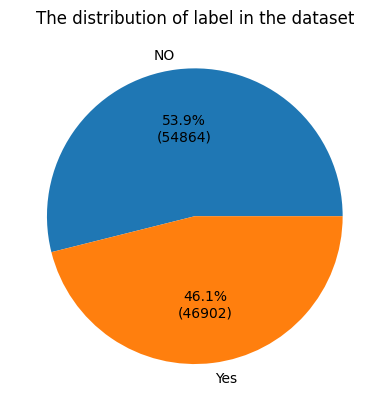

In [7]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label distribution is relatively balanced

In [9]:
sex_column="gender"
privilleged_group="Male"

The analysis of protected variable sex

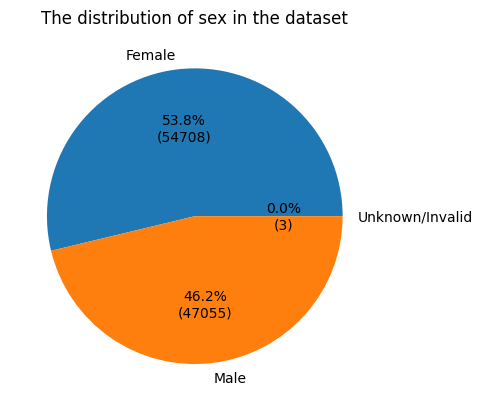

In [10]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attribute of dataset is relatively balanced.

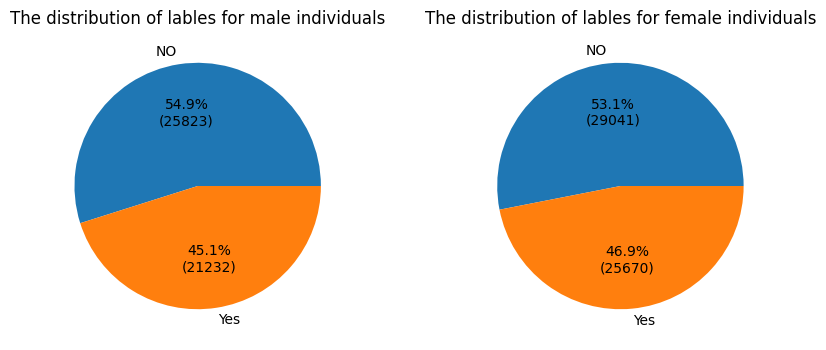

In [11]:
man_df=df.loc[raw_df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[raw_df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

Label distribution of both groups are similar with the overall distribution